In [2199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2200]:
datas=pd.read_csv('/content/titanic_dataset.csv')
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Adding PassengerId as index column

In [2201]:
datas.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Collecting basic details of the dataset


In [2202]:
datas.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Understanding how many null values are there


In [2203]:
datas.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2204]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Plotting histogram for basic understanding


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

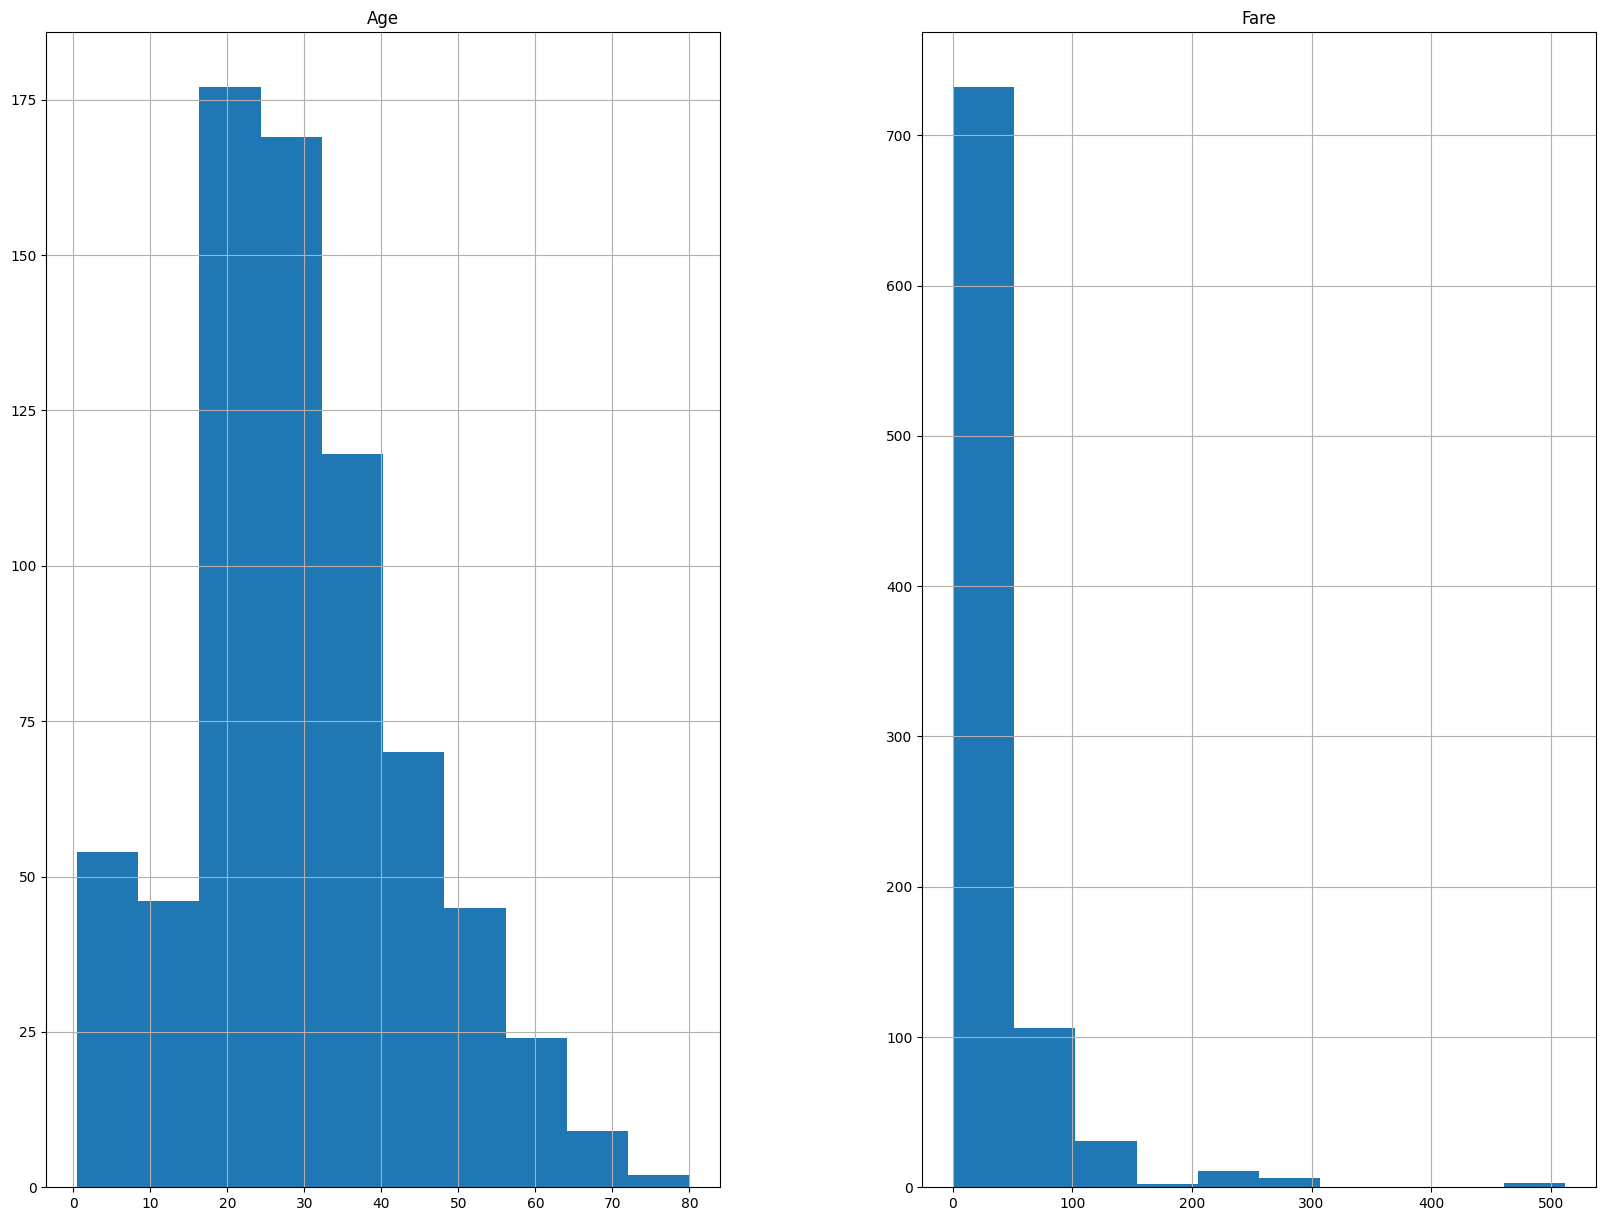

In [2205]:
freqgraph=datas.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

Treating the null values

In [2206]:
datas['Age'].fillna(int(datas['Age'].mean()), inplace=True)
datas['Embarked'].fillna(datas['Embarked'].mode()[0],inplace=True)


In [2207]:
#Or since cabin contains more Na values we can drop that column
datas.drop(columns=['Cabin'], inplace=True)


In [2208]:
datas.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [2209]:
datas.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


Name can be excluded since there is no impact and cabin values can be excluded since there are more null values.Passenger id and ticket fair is not importandt for the survival.

Understanding how Pclass ,sex,SibSp and Parch lead to survival


In [2210]:
datas[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [2211]:
datas[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [2212]:
datas[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [2213]:
datas[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Outlayer finding using boxplot


<Axes: ylabel='SibSp'>

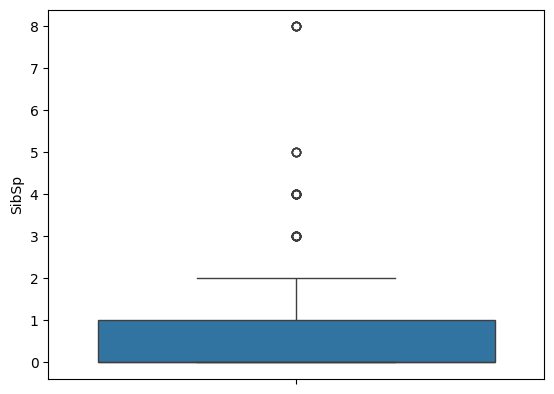

In [2214]:
sns.boxplot(datas['SibSp'])

<Axes: ylabel='Fare'>

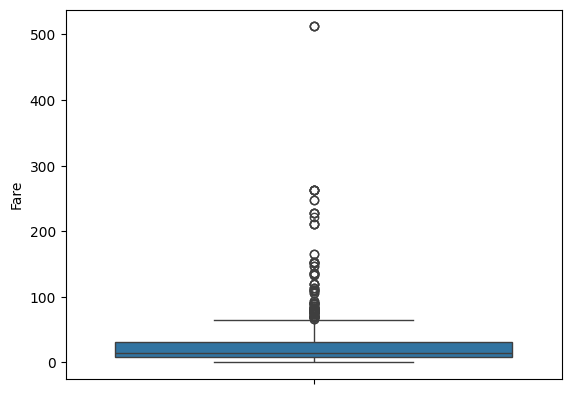

In [2215]:
sns.boxplot(datas['Fare'])

<Axes: ylabel='Age'>

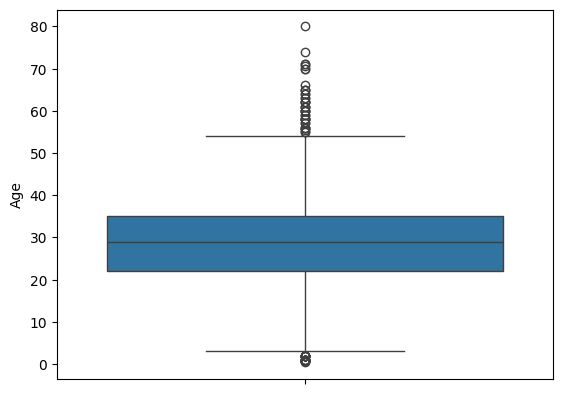

In [2216]:
sns.boxplot(datas['Age'])

Outlayer detecting and handling using IQR method for age fare and Sibsp

In [2217]:
Q1=np.percentile(datas['Fare'],25,method='midpoint')
Q2=np.percentile(datas['Fare'],50,method='midpoint')
Q3=np.percentile(datas['Fare'],75,method='midpoint')
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0


In [2218]:
IQR=Q3-Q1
IQR

23.0896

In [2219]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('Lower limit:',lower_lim)
print('Upper limit:',upper_lim)

Lower limit: -26.724
Upper limit: 65.6344


In [2220]:
outlier=[]
for x in datas['Fare']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [2221]:
datas['Fare']=datas['Fare'].clip(lower=lower_lim,upper=upper_lim)

In [2222]:
outlier=[]
for x in datas['Fare']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[]

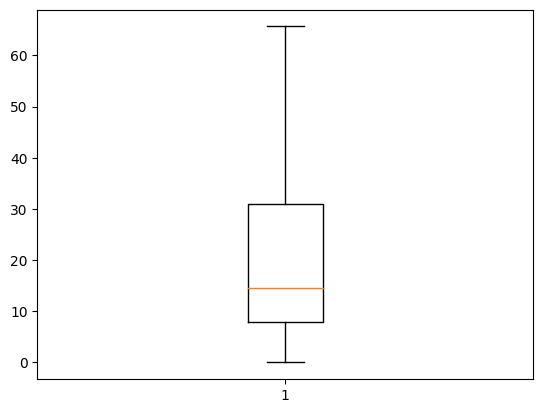

In [2223]:
plt.boxplot(datas['Fare'])
plt.show()

In [2224]:
Q1=np.percentile(datas['Age'],25,method='midpoint')
Q2=np.percentile(datas['Age'],50,method='midpoint')
Q3=np.percentile(datas['Age'],75,method='midpoint')
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)

Q1 is: 22.0
Q2 is: 29.0
Q3 is: 35.0


In [2225]:
IQR=Q3-Q1
IQR

13.0

In [2226]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('Lower limit:',lower_lim)
print('Upper limit:',upper_lim)

Lower limit: 2.5
Upper limit: 54.5


In [2227]:
outlier=[]
for x in datas['Age']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [2228]:
datas['Age']=datas['Age'].clip(lower=lower_lim,upper=upper_lim)

In [2229]:
outlier=[]
for x in datas['Age']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[]

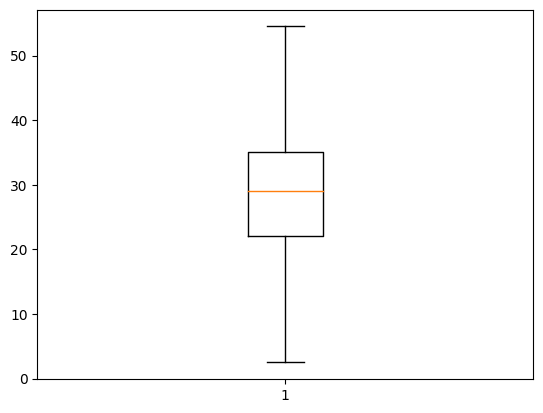

In [2230]:
plt.boxplot(datas['Age'])
plt.show()

In [2231]:
Q1=np.percentile(datas['SibSp'],25,method='midpoint')
Q2=np.percentile(datas['SibSp'],50,method='midpoint')
Q3=np.percentile(datas['SibSp'],75,method='midpoint')
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)

Q1 is: 0.0
Q2 is: 0.0
Q3 is: 1.0


In [2232]:
IQR=Q3-Q1
IQR

1.0

In [2233]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('Lower limit:',lower_lim)
print('Upper limit:',upper_lim)

Lower limit: -1.5
Upper limit: 2.5


In [2234]:
outlier=[]
for x in datas['SibSp']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [2235]:
datas['SibSp']=datas['SibSp'].clip(lower=lower_lim,upper=upper_lim)

In [2236]:
outlier=[]
for x in datas['SibSp']:
  if((x > upper_lim) or (x < lower_lim)):
    outlier.append(x)
outlier

[]

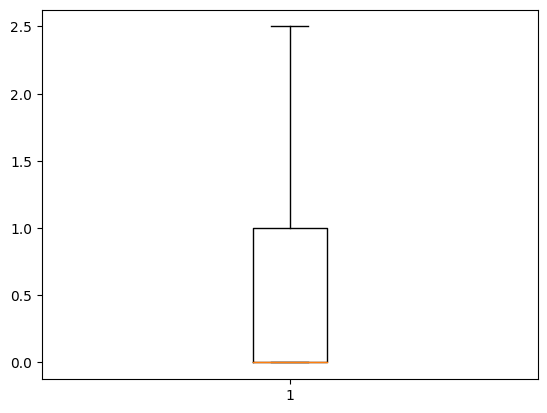

In [2237]:
plt.boxplot(datas['SibSp'])
plt.show()

min max scaling on the feature set (Take ‘Survived’ as target)

In [2238]:
from sklearn.preprocessing import MinMaxScaler
min_scalar=MinMaxScaler()

In [2239]:
datas['Family'] = datas.Parch + datas.SibSp
datas.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S,0.0
5,6,0,3,"Moran, Mr. James",male,29.0,0.0,0,330877,8.4583,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.8625,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.5,2.5,1,349909,21.0750,S,3.5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2,347742,11.1333,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0,237736,30.0708,C,1.0


Name can be dropped there may not be a correlation between Ticket and survival.
Cabin feature can be dropped ,there are more nullvalues
PassengerId may be dropped and it does not contribute to survival.
Ticket can also be dropped SibSp and Parch is dropped since new column is added

In [2240]:
datas = datas.drop(['Name', 'Ticket', 'PassengerId','Embarked','Fare','SibSp','Parch'], axis=1)
datas

,Survived,Pclass,Sex,Age,Family
0,0,3,male,22.0,1.0
1,1,1,female,38.0,1.0
2,1,3,female,26.0,0.0
3,1,1,female,35.0,1.0
4,0,3,male,35.0,0.0
...,...,...,...,...,...
886,0,2,male,27.0,0.0
887,1,1,female,19.0,0.0
888,0,3,female,29.0,3.0
889,1,1,male,26.0,0.0


In [2241]:
datas=pd.get_dummies(datas,dtype=int)

In [2242]:
datas = pd.get_dummies(datas, columns=['Pclass'], dtype=int)
datas

,Survived,Age,Family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1.0,0,1,0,0,1
1,1,38.0,1.0,1,0,1,0,0
2,1,26.0,0.0,1,0,0,0,1
3,1,35.0,1.0,1,0,1,0,0
4,0,35.0,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,27.0,0.0,0,1,0,1,0
887,1,19.0,0.0,1,0,1,0,0
888,0,29.0,3.0,1,0,0,0,1
889,1,26.0,0.0,0,1,1,0,0


Dropping Sex_male because all the required information is already captured within one column .In the Sex_female column, if the passenger is female, then it is encoded as 1 and if not he is encoded as 0 and dropping Pclass_1 since if passenger is Pclass_1 then other val will be 0 and same for other classes

In [2243]:
datas.drop(columns=['Pclass_1','Sex_male'], axis=1, inplace=True)
datas

,Survived,Age,Family,Sex_female,Pclass_2,Pclass_3
0,0,22.0,1.0,0,0,1
1,1,38.0,1.0,1,0,0
2,1,26.0,0.0,1,0,1
3,1,35.0,1.0,1,0,0
4,0,35.0,0.0,0,0,1
...,...,...,...,...,...,...
886,0,27.0,0.0,0,1,0
887,1,19.0,0.0,1,0,0
888,0,29.0,3.0,1,0,1
889,1,26.0,0.0,0,0,0


In [2244]:
data_scaled=min_scalar.fit_transform(datas)

In [2245]:
data_scaled_new=pd.DataFrame(data_scaled)
data_scaled_new.head(10)

,0,1,2,3,4,5
0,0.0,0.375000,0.142857,0.0,0.0,1.0
1,1.0,0.682692,0.142857,1.0,0.0,0.0
2,1.0,0.451923,0.000000,1.0,0.0,1.0
3,1.0,0.625000,0.142857,1.0,0.0,0.0
4,0.0,0.625000,0.000000,0.0,0.0,1.0
5,0.0,0.509615,0.000000,0.0,0.0,1.0
6,0.0,0.990385,0.000000,0.0,0.0,0.0
7,0.0,0.000000,0.500000,0.0,0.0,1.0
8,1.0,0.471154,0.285714,1.0,0.0,1.0
9,1.0,0.221154,0.142857,1.0,1.0,0.0
